In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
sep_length = iris.data[:,0]
y = np.array([4, 6, 8, 2, 4, 1])
x = np.array([1, 5, 8, 2, 7, 4])
print(np.concatenate([x, y]))
a_1, a_2 = train_test_split(sep_length, test_size=0.4, random_state=0)
b_1, b_2 = train_test_split(sep_length, test_size=0.4, random_state=1)

[1 5 8 2 7 4 4 6 8 2 4 1]


In [14]:
print(b_1.shape, b_2.shape)
mu1 = np.mean(a_1)
 
mu2 = np.mean(b_1)
print(a_1.shape, a_2.shape)
print(np.std(a_1), np.std(b_1))
print(stats.ttest_ind(a_1, b_1, equal_var = False))
print(stats.ttest_ind(b_1, a_1, equal_var=False))
print(stats.ttest_ind(a_1, b_1, equal_var=True))

(90,) (60,)
(90,) (60,)
0.8848972877552193 0.7912242428472069
TtestResult(statistic=0.830066093774641, pvalue=0.4076270841218669, df=175.8171155714046)
TtestResult(statistic=-0.830066093774641, pvalue=0.4076270841218669, df=175.8171155714046)
TtestResult(statistic=0.830066093774641, pvalue=0.4076132965045395, df=178.0)


In [17]:
trial_1 = [10, 12.1, 9.2, 11.6, 8.3, 10.5]
trial_2 = [8.2, 11.2, 8.1, 10.5, 7.6, 9.5]
paired_data = pd.DataFrame(trial_1, trial_2)
print(stats.ttest_rel(trial_1, trial_2))

TtestResult(statistic=7.201190377787752, pvalue=0.0008044382024663002, df=5)


In [18]:
# importing the required function
from scipy.stats import binom
n = 10 # number of visitors selected randomly
p = 0.80 # the probability that a visitor will end up buying a souvenir
k = np.arange(0,11) # different possible number of visitors selected in a numpy array i.e. 0 or 5 etc
print(k)
# generate the probability distribution
binomial = binom.pmf(k=k, n=n, p=p)
print(binomial)

[ 0  1  2  3  4  5  6  7  8  9 10]
[1.02400000e-07 4.09600000e-06 7.37280000e-05 7.86432000e-04
 5.50502400e-03 2.64241152e-02 8.80803840e-02 2.01326592e-01
 3.01989888e-01 2.68435456e-01 1.07374182e-01]


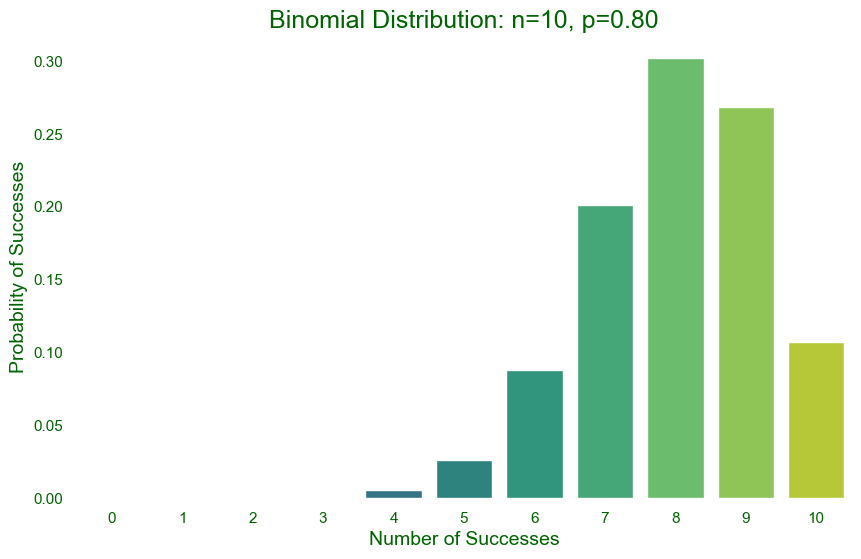

In [21]:
import seaborn as sns
# style & colors
sns.set(style="white")
colors = sns.color_palette("viridis", n_colors=len(binomial))

# Plotting the distribution with gradient color bars
plt.figure(figsize=(10, 6))
sns.barplot(x=k, y=binomial, palette=colors)

sns.despine(left=True, bottom=True)

# Setting the title and labels
plt.title("Binomial Distribution: n=%i, p=%.2f" % (n, p), fontsize=18, color='darkgreen')
plt.xlabel("Number of Successes", fontsize=14, color='darkgreen')
plt.ylabel("Probability of Successes", fontsize=14, color='darkgreen')

plt.xticks(color='darkgreen')
plt.yticks(color='darkgreen')

plt.show()

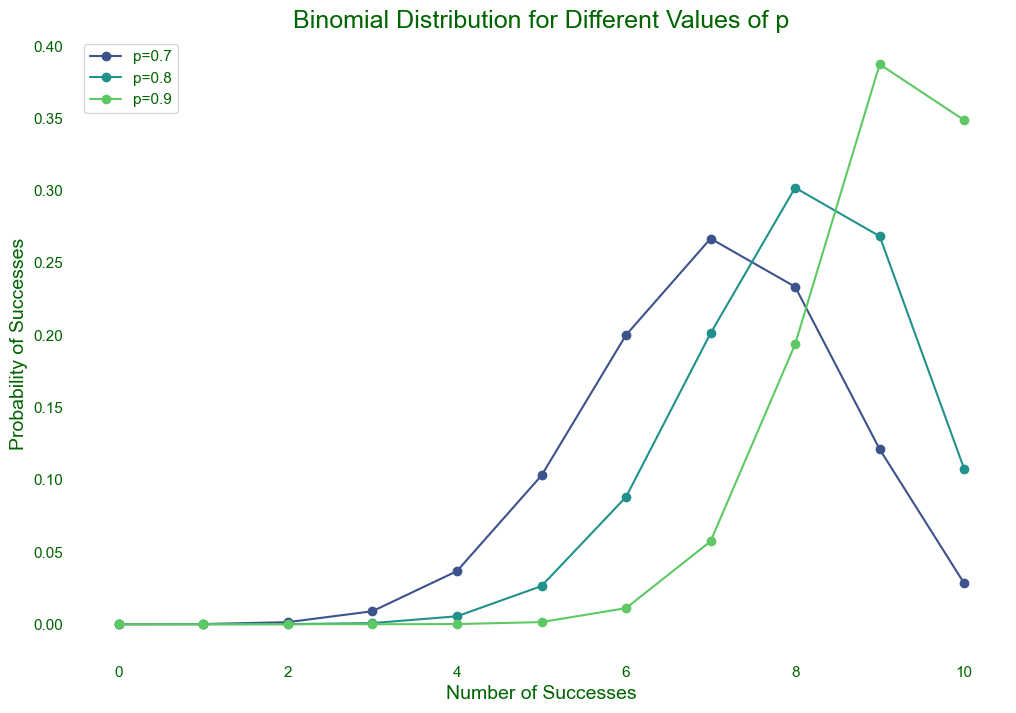

In [22]:
# Parameters
n = 10
k = range(n + 1)
p_values = [0.70, 0.80, 0.90]

# Set the style 
sns.set(style="white")
colors = sns.color_palette("viridis", n_colors=len(p_values))

# Plotting PMFs for different values of p
plt.figure(figsize=(12, 8))

for p, color in zip(p_values, colors):
    binomial_pmf = [stats.binom.pmf(i, n, p) for i in k]
    plt.plot(k, binomial_pmf, marker='o', linestyle='-', label=f'p={p}', color=color)


sns.despine(left=True, bottom=True)

# Setting the title and labels
plt.title("Binomial Distribution for Different Values of p", fontsize=18, color='darkgreen')
plt.xlabel("Number of Successes", fontsize=14, color='darkgreen')
plt.ylabel("Probability of Successes", fontsize=14, color='darkgreen')


plt.xticks(color='darkgreen')
plt.yticks(color='darkgreen')

# Add legend with darkgreen labels
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('darkgreen')

plt.show()

In [23]:
from scipy.stats import chi2_contingency

# Observed frequencies
observed = [[30, 50, 20], [40, 25, 35]]

# Perform Chi-Squared test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print results
print(observed)
print("Chi-Squared test statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

[[30, 50, 20], [40, 25, 35]]
Chi-Squared test statistic: 13.852813852813853
p-value: 0.0009815212181401212
Degrees of freedom: 2
Expected frequencies: [[35.  37.5 27.5]
 [35.  37.5 27.5]]


In [24]:
import pandas as pd
from scipy.stats import chisquare

# Define the student data
data = {
    'Class': ['A', 'B', 'C', 'D', 'E'],
    'Observed': [157, 191, 186, 163, 303]
}

# Transform dictionary into dataframe
df = pd.DataFrame(data)

# Define the null and alternative hypotheses
null_hypothesis = "p1 = 20%, p2 = 20%, p3 = 20%, p4 = 20%, p5 = 20%"
alternative_hypothesis = "The population proportions do not match the given proportions"

# Calculate the total number of observations and the expected count for each category
total_count = df['Observed'].sum()
expected_count = total_count / len(df)  # As there are 5 categories

# Create a list of observed and expected counts
observed_list = df['Observed'].tolist()
expected_list = [expected_count] * len(df)

# Perform the Chi-Squared goodness-of-fit test
chi2_stat, p_val = chisquare(f_obs=observed_list, f_exp=expected_list)

# Print the results
print(f"\nChi2 Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# Print the conclusion
if p_val < 0.05:
    print("Reject the null hypothesis: The population proportions do not match the given proportions.")
else:
    print("Fail to reject the null hypothesis: The population proportions match the given proportions.")


Chi2 Statistic: 70.52
P-value: 0.0000
Reject the null hypothesis: The population proportions do not match the given proportions.


In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create the dataset
data = {
    'Class': ['group A', 'group B', 'group C', 'group D', 'group E'],
    'Taken Course': [91, 131, 117, 75, 197],
    'Not Taken Course': [66, 60, 69, 88, 106]
}

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index('Class', inplace=True)

# Perform the Chi-Squared test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(df)

# Print the results
print("Expected Counts:")
print(pd.DataFrame(expected, index=df.index, columns=df.columns))
print(f"\nChi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Print the conclusion
if p_val < 0.05:
    print("\nReject the null hypothesis: The variables are not independent")
else:
    print("\nFail to reject the null hypothesis: The variables are independent")

Expected Counts:
         Taken Course  Not Taken Course
Class                                  
group A        95.927            61.073
group B       116.701            74.299
group C       113.646            72.354
group D        99.593            63.407
group E       185.133           117.867

Chi2 Statistic: 22.9758
P-value: 0.0001

Reject the null hypothesis: The variables are not independent


In [29]:
import pandas as pd
import numpy as np
np.random.seed(42)
#Create Artificial randomly distributed data representing students' running competition records
USA = np.random.normal(loc=74,scale=4,size=40)
UK = np.random.normal(loc=88,scale=4,size=40)
Germany = np.random.normal(loc=84,scale=4,size=40)
for i in range(3):
    print(['USA: ','UK: ','Germany: '][i],[USA,UK,Germany][i].mean().round(1))
#Create Dataframes representing each student groups
list_USA = []
for i in range(40): list_USA.append('USA')
df_USA = pd.DataFrame(data={'Country':list_USA,'Results':list(map(lambda x: x.round(1), USA))})
list_UK = []
for i in range(40): list_UK.append('UK')
df_UK = pd.DataFrame(data={'Country':list_UK,'Results':list(map(lambda x: x.round(1), UK))})
list_Germany = []
for i in range(40): list_Germany.append('Germany')
df_Germany = pd.DataFrame(data={'Country':list_Germany,'Results':list(map(lambda x: x.round(1), Germany))})
#Concatenate the data frames into one
df_students = pd.concat([df_USA,df_UK,df_Germany],ignore_index=True)
df_students

USA:  73.1
UK:  87.9
Germany:  84.0


,Country,Results
0,USA,76.0
1,USA,73.4
2,USA,76.6
3,USA,80.1
4,USA,73.1
...,...,...
115,Germany,85.2
116,Germany,83.9
117,Germany,79.3
118,Germany,88.6


C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


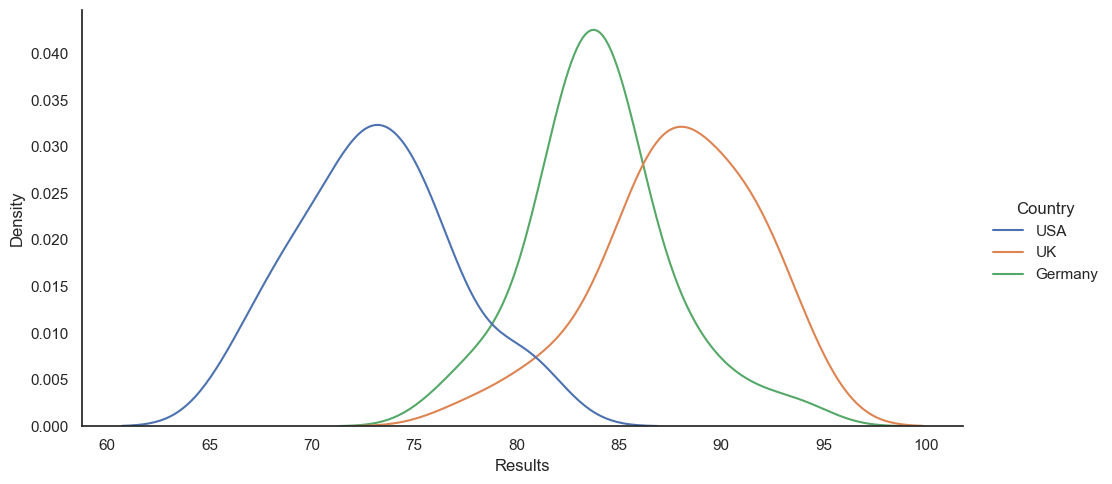

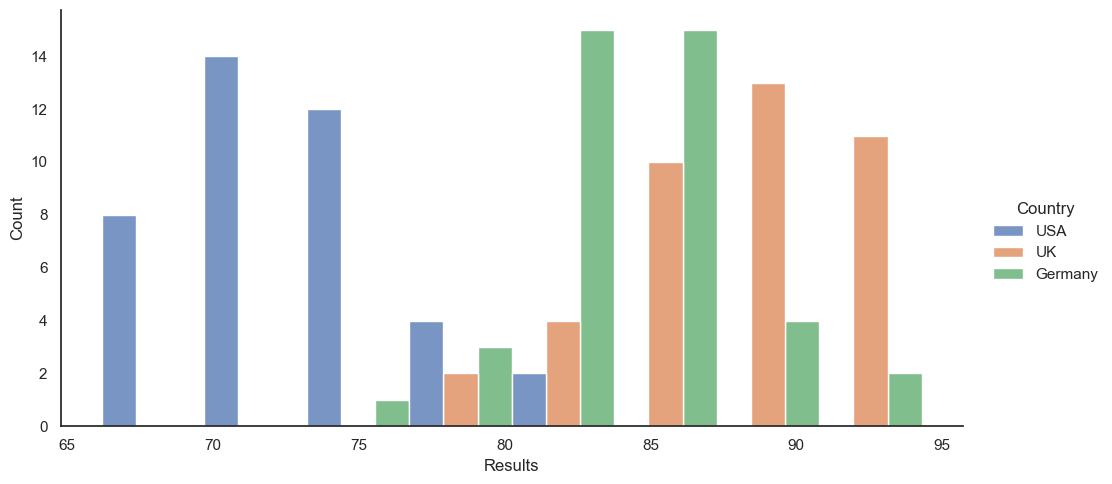

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.displot(df_students,x='Results',hue='Country',kind='kde',height=5,aspect=2)
sns.displot(df_students,x='Results',hue='Country',multiple='dodge',height=5,aspect=2)

In [32]:
#Normality:
from scipy import stats
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue <= 0.05:
        return f'The distribution departed from normality significantly, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}'
    else:
        return f"Shapiro Wilk Test result didn't show non-normality, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}. There is no evidence to reject the null hypothesis of normality."
for i in range(3):
    print(["For the USA: ","For the UK: ","For the Germany: "][i], shapiro_test([USA,UK,Germany][i]))
    print('\n')


For the USA:  Shapiro Wilk Test result didn't show non-normality, W= 0.98, P value= 0.66. There is no evidence to reject the null hypothesis of normality.


For the UK:  Shapiro Wilk Test result didn't show non-normality, W= 0.97, P value= 0.37. There is no evidence to reject the null hypothesis of normality.


For the Germany:  Shapiro Wilk Test result didn't show non-normality, W= 0.97, P value= 0.33. There is no evidence to reject the null hypothesis of normality.




In [35]:
#Quick look at the variances
print([round(np.var(x, ddof=1),3) for x in [USA,UK,Germany]])
from scipy.stats import bartlett
alpha = 0.05
stat, p_bartlet = bartlett(USA,UK,Germany)
if p_bartlet <= alpha:
    print(p_bartlet,": small p-value suggests that populations do not have equal variances")
else:
    print(p_bartlet, ": large p-value suggests that our data is homogeneous")
from scipy.stats import f 
dfn = len([USA,UK,Germany])-1
dfd = len(df_students) - len([USA,UK,Germany])
f_crit = f.ppf(1-alpha,dfn,dfd)
print(f_crit)

[14.526, 14.892, 11.891]
0.7509512418165141 : large p-value suggests that our data is homogeneous
3.073762904449709


In [37]:
#Calculate overal mean
overal_mean = sum(df_students.Results/len(df_students))
#Calculate sums of squared mean differences for each observation in each group
ssb = []
for i in df_students.Country.unique():
    group_mean = df_students[df_students.Country == i].Results.mean()
    sqr_mean_diff = (group_mean-overal_mean)**2
    sum_sqr = len(df_students[df_students.Country == i])*sqr_mean_diff
    ssb.append(sum_sqr)
#Sum of group variability of each group
SSb = sum(ssb)
print(SSb)
#Calculate MSb (Explained Variance)
k = len(df_students.Country.unique())
MSb = SSb/(k-1)
print(MSb)

4686.961999999994
2343.480999999997


In [41]:
#Calculate sum of the squared differences between the observations and its group variance for each group
sum_sqr_diff = []
for i in df_students.Country.unique():
    group_mean = df_students[df_students.Country == i].Results.mean()
    sum_sqr = sum(list(map(lambda x: (x-group_mean)**2, df_students[df_students.Country == i].Results)))
    sum_sqr_diff.append(sum_sqr)
    print(i,": "+str(sum_sqr))
#Add them together
SSw = sum(sum_sqr_diff)
print("SSw: " + str(SSw))
#Calculate MSw (Unexplained Variance) 
N = len(df_students)
MSw = SSw/(N-k)
print('MSw: ',MSw)

USA : 567.1197500000001
UK : 582.7777500000004
Germany : 465.91375000000033
SSw: 1615.8112500000009
MSw:  13.81035256410257


In [44]:
anova_table = pd.DataFrame({"Variation Source": ["Between Groups","Erro Residual","Total"],
                  "Sums of Squares":[round(SSb,2),round(SSw,2),round(SSb+SSw,2)],
                 "Mean Squares":[round(MSb,2),round(MSw,2),""]})
anova_table.set_index("Variation Source",inplace=True)
print(anova_table)
F_stat = MSb/MSw
print(F_stat)
#Find the P-value 
p_value = f.sf(F_stat, dfn, dfd) #find p-value of F test statistic
print(p_value)

                  Sums of Squares Mean Squares
Variation Source                              
Between Groups            4686.96      2343.48
Erro Residual             1615.81        13.81
Total                     6302.77             
169.69016461545215
2.61968002752207e-35


In [45]:
#Reject the null Hypothesis 
if (F_stat > f_crit) & (p_value<alpha):
    print(f"We reject H0 because f-statisitic {F_stat} > f-critical{f_crit} and p-value{p_value} < alpha{alpha}",
         "\nWe have significant evidence at 0.05 level the student groups are belong to different populations.")

We reject H0 because f-statisitic 169.69016461545215 > f-critical3.073762904449709 and p-value2.61968002752207e-35 < alpha0.05 
We have significant evidence at 0.05 level the student groups are belong to different populations.


In [47]:
anova_table["F"] =[F_stat,"",""]
anova_table['P-Value'] = [str(p_value),"",""]
anova_table

,Sums of Squares,Mean Squares,F,P-Value
Variation Source,,,,
Between Groups,4686.96,2343.48,169.690165,2.61968002752207e-35
Erro Residual,1615.81,13.81,,
Total,6302.77,,,


In [48]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_students = ols('Results~Country',data=df_students).fit()
# examine the anova table 
anova_table = sm.stats.anova_lm(anova_students, type=2)
print(anova_table)

             df      sum_sq      mean_sq           F        PR(>F)
Country     2.0  4686.96200  2343.481000  169.690165  2.619680e-35
Residual  117.0  1615.81125    13.810353         NaN           NaN


In [50]:
stats.f_oneway(df_students['Results'][df_students['Country']=="UK"],
              df_students['Results'][df_students['Country']=="Germany"],
              df_students['Results'][df_students['Country']=="USA"])


F_onewayResult(statistic=169.69016461545252, pvalue=2.619680027521838e-35)